In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from netCDF4 import Dataset
import pandas as pd

from functools import partial

In [2]:
data = pd.read_parquet("../data/data_file_NTLP_decoupled_400M.parquet")

In [4]:
data["be flag"].mean()

np.float64(0.9992913946960588)

In [3]:
data[data["be flag"] == 0].describe()

,particle id,be flag,time,input radius,input temperature,salinity,air temperature,relative humidity,air density,processor,integration time,output radius,output temperature
count,3.135000e+05,313500.0,313500.000000,3.135000e+05,313500.000000,3.135000e+05,313500.000000,313500.000000,313500.000000,313500.000000,313500.0,313500.0,313500.0
mean,1.707892e+05,0.0,237.156570,1.907281e-05,290.143494,2.211682e-18,289.773743,208.656326,0.995525,31.064332,0.0,0.0,0.0
std,2.606671e+05,0.0,269.820221,1.087489e-05,1.176931,0.000000e+00,1.072286,1186.326416,0.066748,18.412346,0.0,0.0,0.0
min,2.000000e+02,0.0,2.547703,2.000000e-07,210.230804,2.211681e-18,285.504456,1.002058,0.000000,0.000000,0.0,0.0,0.0
25%,4.643000e+03,0.0,45.248478,1.162850e-05,289.565735,2.211681e-18,289.258057,1.025914,1.000000,15.000000,0.0,0.0,0.0
50%,3.842600e+04,0.0,132.280472,1.908781e-05,289.925537,2.211681e-18,289.592377,1.031755,1.000000,30.000000,0.0,0.0,0.0
75%,2.076530e+05,0.0,307.343262,2.639328e-05,290.424194,2.211681e-18,290.034851,1.040907,1.000000,46.000000,0.0,0.0,0.0
max,1.052853e+06,0.0,1037.538208,5.619530e-05,298.864777,2.211681e-18,298.839874,6987.145996,1.000000,63.000000,0.0,0.0,0.0


In [6]:
data[(data["be flag"] == 0) & (data["input radius"]==2.0e-7)].describe()

,particle id,be flag,time,input radius,input temperature,salinity,air temperature,relative humidity,air density,processor,integration time,output radius,output temperature
count,1.623500e+04,16235.0,16235.000000,1.623500e+04,16235.000000,1.623500e+04,16235.000000,16235.000000,16235.000000,16235.000000,16235.0,16235.0,16235.0
mean,5.083142e+05,0.0,502.487885,2.000000e-07,290.250153,2.211681e-18,290.250153,4010.257812,0.972405,30.205975,0.0,0.0,0.0
std,3.235978e+05,0.0,318.479980,0.000000e+00,0.581122,0.000000e+00,0.581122,3454.805908,0.163814,18.564312,0.0,0.0,0.0
min,2.000000e+02,0.0,2.547703,2.000000e-07,289.628296,2.211681e-18,289.628296,1.016389,0.000000,0.000000,0.0,0.0,0.0
25%,2.126150e+05,0.0,210.113571,2.000000e-07,290.000000,2.211681e-18,290.000000,1.056281,1.000000,12.000000,0.0,0.0,0.0
50%,5.076520e+05,0.0,500.209595,2.000000e-07,290.000000,2.211681e-18,290.000000,6987.145996,1.000000,29.000000,0.0,0.0,0.0
75%,8.078465e+05,0.0,797.827271,2.000000e-07,290.299927,2.211681e-18,290.299927,6987.145996,1.000000,45.000000,0.0,0.0,0.0
max,1.052659e+06,0.0,1036.960938,2.000000e-07,293.425262,2.211681e-18,293.425262,6987.145996,1.000000,63.000000,0.0,0.0,0.0


In [7]:
data[data["relative humidity"] > 50.0].describe()

,particle id,be flag,time,input radius,input temperature,salinity,air temperature,relative humidity,air density,processor,integration time,output radius,output temperature
count,3.368960e+05,336896.000000,336896.000000,3.368960e+05,336896.0,3.368960e+05,336896.0,336896.000000,336896.000000,336896.000000,336896.000000,3.368960e+05,336896.000000
mean,5.265315e+05,0.972345,519.123840,2.000000e-07,290.0,2.211682e-18,290.0,6987.145996,0.950798,31.500000,0.103859,6.607076e-07,281.816534
std,3.039176e+05,0.163984,298.868866,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.216290,18.472981,0.023440,2.265758e-07,47.542812
min,2.000000e+02,0.000000,2.547703,2.000000e-07,290.0,2.211681e-18,290.0,6987.145996,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.633658e+05,1.000000,260.470093,2.000000e-07,290.0,2.211681e-18,290.0,6987.145996,1.000000,15.750000,0.098755,6.153796e-07,289.411987
50%,5.265315e+05,1.000000,518.513550,2.000000e-07,290.0,2.211681e-18,290.0,6987.145996,1.000000,31.500000,0.108444,6.853953e-07,289.789856
75%,7.896972e+05,1.000000,777.648376,2.000000e-07,290.0,2.211681e-18,290.0,6987.145996,1.000000,47.250000,0.117249,7.540162e-07,290.164429
max,1.052863e+06,1.000000,1035.747681,2.000000e-07,290.0,2.211681e-18,290.0,6987.145996,1.000000,63.000000,0.141537,1.136091e-05,296.035278


In [5]:
data[data["input radius"] == 2.0e-7].describe()

,particle id,be flag,time,input radius,input temperature,salinity,air temperature,relative humidity,air density,processor,integration time,output radius,output temperature
count,3.846000e+05,384600.000000,384600.000000,3.846000e+05,384600.000000,3.846000e+05,384600.000000,384600.000000,384600.000000,384600.000000,384600.000000,3.846000e+05,384600.000000
mean,5.312507e+05,0.957787,523.969360,2.000000e-07,290.052246,2.211682e-18,290.052246,6120.622070,0.956791,31.386968,0.102339,6.364090e-07,277.663168
std,3.047646e+05,0.201074,299.770233,0.000000e+00,0.243899,0.000000e+00,0.243899,2302.773438,0.203326,18.466272,0.026436,2.990623e-07,58.312063
min,2.000000e+02,0.000000,2.547703,2.000000e-07,288.917389,2.211681e-18,288.917389,1.011581,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.676448e+05,1.000000,265.237488,2.000000e-07,290.000000,2.211681e-18,290.000000,6987.145996,1.000000,15.000000,0.098328,5.993580e-07,289.442108
50%,5.342440e+05,1.000000,526.319580,2.000000e-07,290.000000,2.211681e-18,290.000000,6987.145996,1.000000,31.000000,0.108231,6.819296e-07,289.853424
75%,7.998572e+05,1.000000,788.430298,2.000000e-07,290.000000,2.211681e-18,290.000000,6987.145996,1.000000,47.000000,0.117188,7.571966e-07,290.288734
max,1.052863e+06,1.000000,1037.886719,2.000000e-07,293.490814,2.211681e-18,293.490814,6987.145996,1.000000,63.000000,0.143328,1.136091e-05,296.035278


In [7]:
history_folder = "../history/uncoupled/export/"
#history_filenames = ["history_uncoupled_OG.nc",
#                    "history_uncoupled_MLP.nc",
#                    "history_uncoupled_MLP_400M.nc",
#                    "history_uncoupled_MLP_unbounded.nc"]

history_filenames = ["history_uncoupled_OG.nc", "history_uncoupled_MLP.nc"]

histogram_filenames = ["histograms_uncoupled_fixed.nc"]
history_file_count = len(history_filenames)
histogram_file_count = len(histogram_filenames)
history_names = [" ".join(filename.split(".")[0].split("_")[1:]).replace("-", " ") for filename in history_filenames]

history_variable_names = ["time",
                          "meanRH",
                  "radavg",
                  "Tpmean_average",
                  "Tfmean_average",
                  "tnumpart"]
history_variable_labels = ["time (s)",
                           "Volume-average relative humidity [%]",
                   "Average radius of all particles [m]",
                   "Average temperature of all particles [K]",
                   "Average air temperature of all particles [K]",
                   "Number of particles [#]"]
history_averaged_variables = ["Tpmean", "Tfmean"]

histogram_time_step = 15

In [6]:
histogram_files = [Dataset(history_folder + filename, mode='a') for filename in histogram_filenames]

histogram_times = [file.variables["time"][:] for file in histogram_files]

histogram_samples = [i*histogram_time_step + 3 for i in range(len(histogram_times[0])//histogram_time_step + 1)]

histogram_variable_names = ["rad", "tp"]
histogram_variables = [[[file.variables[varname + "bins"][:],[file.variables[varname + "hist"][:]]] for file in histogram_files] for varname in histogram_variable_names]


KeyError: 'time'

In [3]:
history_files = [Dataset(history_folder + filename, mode='a') for filename in history_filenames]

for v in history_averaged_variables:
    for file in history_files:
        variable = file.variables[v]
        if v + "_average" in file.variables.keys():
            average_variable = file.variables[v + "_average"]
        else:
            average_variable = file.createVariable(v + "_average", np.float64, ('time',))
        average_variable[:] = np.mean(variable, axis=1)

In [4]:

history_variables = [[file.variables[varname][3:] for file in history_files] for varname in history_variable_names]

Text(0.5, 0.98, 'History graphs of network NTLP uncoupled 400M against its training data - sha: 58d8bcfe1acd553f47c2b8e840c90c49d72f9947')

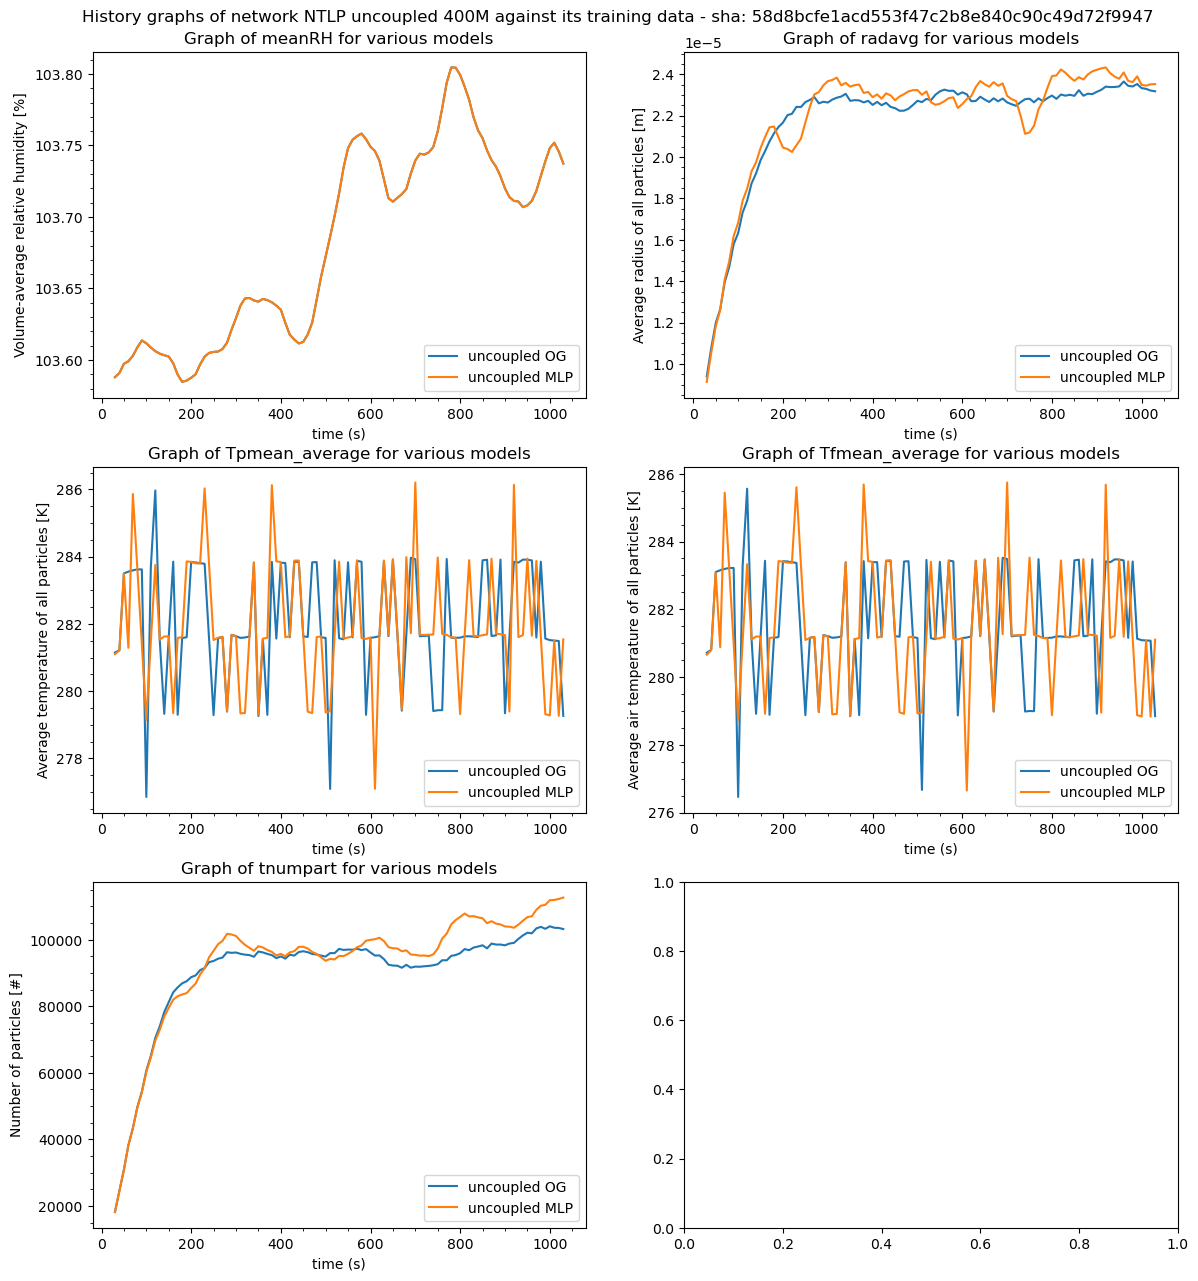

In [8]:
fig, axs = plt.subplots((len(history_variables)//2), 2)
fig.set_figheight(14)
fig.set_figwidth(14)

fig.subplots_adjust(top=0.95)

for i in range(1,len(history_variables)):
    index = [(i-1)//2, (i-1)%2]
    for j in range(history_file_count):
        axs[*index].plot(history_variables[0][j], history_variables[i][j])
    #for t in histogram_samples:
     #   axs[*index].axvspan(histogram_times[0][t], histogram_times[0][t]+5, facecolor='lightgray', alpha=0.8)
    
    axs[*index].legend(history_names, loc="lower right")
    axs[*index].set_title("Graph of " + history_variable_names[i] + " for various models")
    axs[*index].set(xlabel=history_variable_labels[0], ylabel=history_variable_labels[i])
    axs[*index].minorticks_on()

fig.suptitle("History graphs of network NTLP uncoupled 400M against its training data - sha: 58d8bcfe1acd553f47c2b8e840c90c49d72f9947")

Histogram:  3
Histogram:  18
Histogram:  33
Histogram:  48


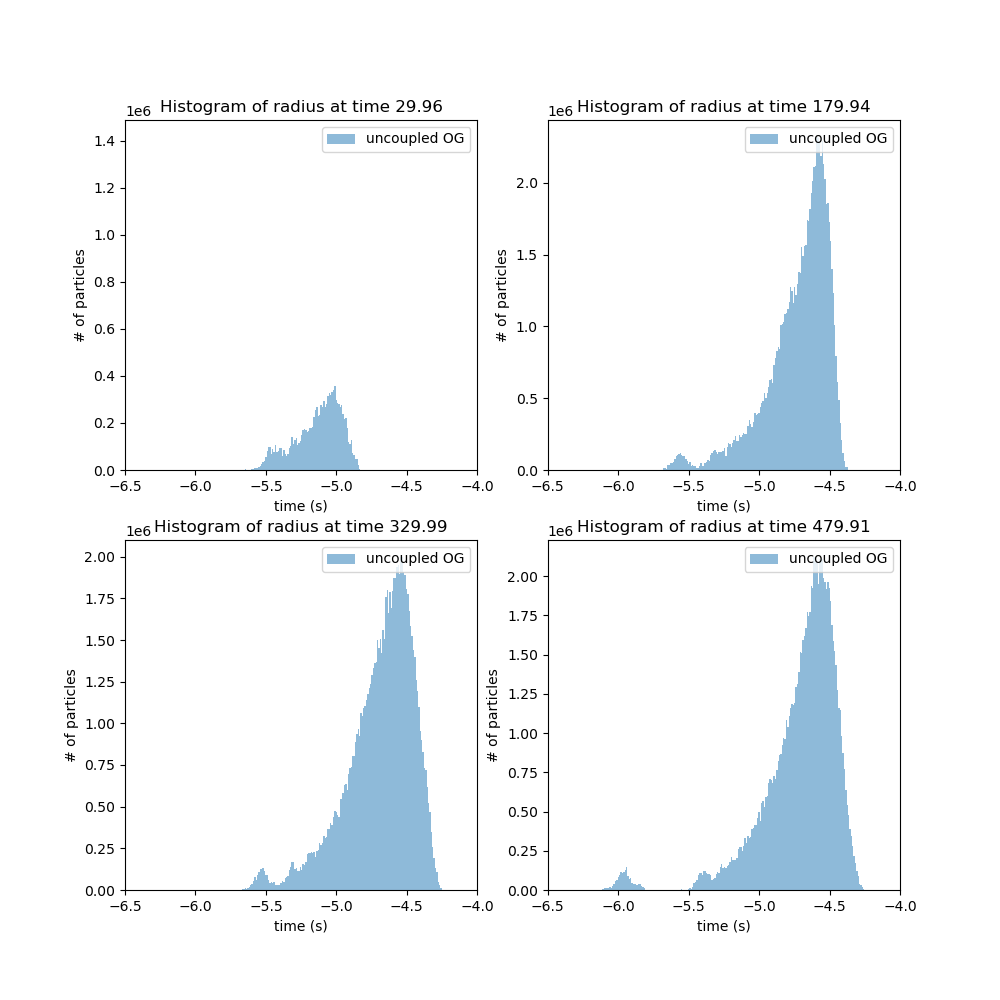

In [9]:
histogram_count = len(histogram_variables[0][0][1][0])//histogram_time_step + 1
# NOTE may note have the same number of histograms - fix later. Probably take the min across all

fig, axs = plt.subplots(np.ceil(histogram_count/2.0).astype(int), 2)
fig.set_figheight(8)
fig.set_figwidth(14)
for i,sample in enumerate(histogram_samples):
    print("Histogram: ", sample)
    index = [i//2, i%2]
    for j in range(histogram_file_count):
        counts = histogram_variables[0][j][1][0][sample]
        bins = histogram_variables[0][j][0]
        
        axs[*index].hist(bins[:len(counts)],bins=bins, weights=counts, alpha=0.5)
    axs[*index].legend(history_names, loc="upper right")
    axs[*index].set_title(f"Histogram of radius at time {histogram_times[0][sample]:.2f}")
    axs[*index].set(xlabel="time (s)", ylabel="# of particles", xlim=(-6.5,-4.0))

#### 

Histogram:  3
Histogram:  18
Histogram:  33
Histogram:  48


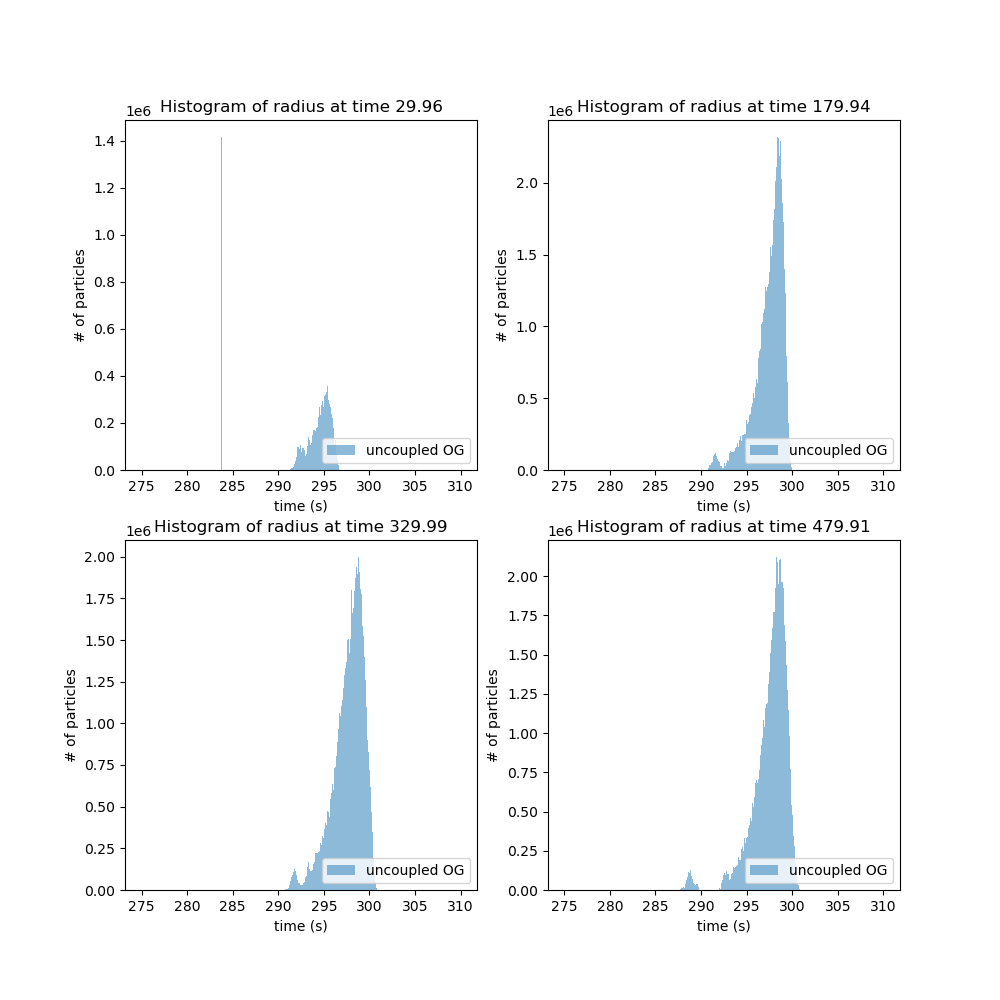

In [10]:
fig, axs = plt.subplots(np.ceil(len(histogram_samples)/2.0).astype(int), 2)
fig.set_figheight(10)
fig.set_figwidth(10)
for i,sample in enumerate(histogram_samples):
    print("Histogram: ", sample)
    index = [i//2, i%2]
    for j in range(histogram_file_count):
        counts = histogram_variables[1][j][1][0][sample]
        bins = histogram_variables[1][j][0]

        bins = 10**bins

        axs[*index].hist(bins[:len(counts)],bins=bins, weights=counts, alpha=0.5)
    axs[*index].legend(history_names, loc="lower right")
    axs[*index].set_title(f"Histogram of radius at time {histogram_times[0][sample]:.2f}")
    axs[*index].set(xlabel="time (s)", ylabel="# of particles")

plt.show()

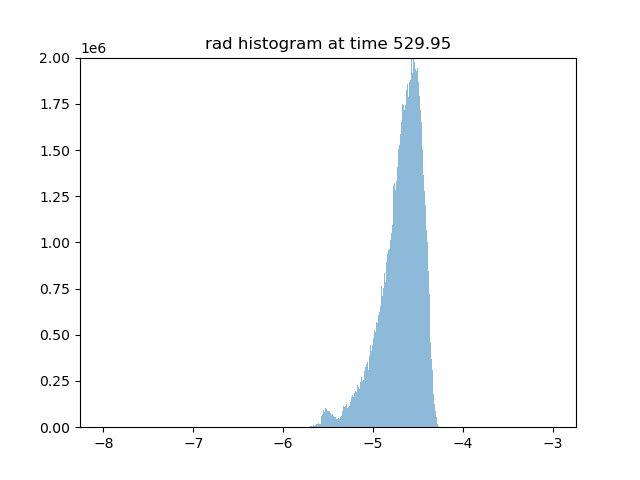

In [11]:
fig = plt.figure()

ani1 = animation.FuncAnimation(fig, partial(animate_histogram, var_index=0),frames=len(histogram_times[0]), interval=500)

ani1.save('radius_animation.gif', writer='pillow', fps=5)


ani1.event_source.stop()

IndexError: list index out of range

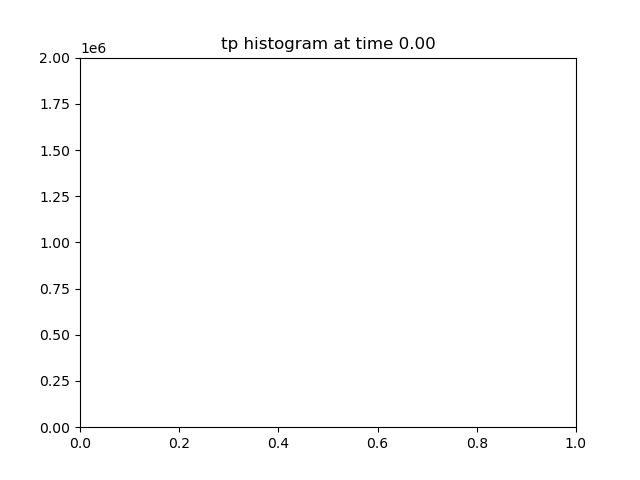

In [12]:
fig = plt.figure()

ani2 = animation.FuncAnimation(fig, partial(animate_histogram, var_index=1),frames=len(histogram_times[0]), interval=500)

ani2.save('temperature_animation.gif', writer='pillow', fps=5)

ani2.event_source.stop()

In [ ]:
ani2.event_source.stop()

In [ ]:
print(len(histogram_times[0]))